In [1]:
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')                
tf.config.experimental.set_visible_devices(gpus[3], 'GPU')

In [3]:
import pandas as pd
import json
import os 
import glob
from pandas import json_normalize
import numpy as np
from tensorflow import keras
from tensorflow.keras import *
from PIL import *

In [4]:
target = r"C:/AIFactory/ETC/open/json/*"
target_json = glob.glob(target)
target_json[0]


'C:/AIFactory/ETC/open/json\\0.json'

In [5]:
 b = []
for i in target_json:
    with open(i,"r") as j:
        contents = json.loads(j.read())
        a = json_normalize(contents['annotations'])
        b.append(a)

In [6]:
train_json = pd.concat(b)

In [7]:
train_json

,id,image_id,category_id,category_name,data
0,0,0,0,숫자 1,"[[943.4659194946289, 678.9908051490784, -0.072..."
1,0,1,0,숫자 1,"[[942.1134567260742, 710.6305289268494, 0.0120..."
2,0,2,0,숫자 1,"[[937.2750091552734, 727.2869825363159, -0.076..."
3,0,3,0,숫자 1,"[[940.616455078125, 710.7663559913635, -0.0072..."
4,0,4,0,숫자 1,"[[948.3236503601074, 691.9128513336182, -0.056..."
...,...,...,...,...,...
5,99,5,31,"검지,중지 교차","[[950.6074905395508, 756.8642592430115, -0.108..."
6,99,6,31,"검지,중지 교차","[[951.2955093383789, 756.7963457107544, -0.108..."
7,99,7,31,"검지,중지 교차","[[949.3386840820312, 756.8854379653931, -0.131..."
8,99,8,31,"검지,중지 교차","[[949.8169326782227, 759.0130305290222, -0.134..."


In [8]:
train_json['split'] = train_json['id']

In [9]:
train_json['category_id'].nunique()

157

In [10]:
train_json1 = train_json.drop(columns = ['id','image_id','category_name','data'])
train_json1['category_id'] = train_json1['category_id'].astype('int')
train_json1['split'] = train_json1['split'].astype('int')
train_json2 = train_json1.reset_index(drop=True)

In [11]:
test_target = r"C:/AIFactory/ETC/open/test/**/*.png"
test_target_png = glob.glob(test_target)

test = pd.DataFrame({'path': test_target_png})
test.head(3)

,path
0,C:/AIFactory/ETC/open/test\649\0.png
1,C:/AIFactory/ETC/open/test\649\1.png
2,C:/AIFactory/ETC/open/test\649\2.png


In [12]:
target = r"C:/AIFactory/ETC/open/train/**/*.png"
target_png = glob.glob(target)
target_png[0]


'C:/AIFactory/ETC/open/train\\0\\0.png'

In [13]:
train = pd.DataFrame({'path': target_png})
train.head(3)

,path
0,C:/AIFactory/ETC/open/train\0\0.png
1,C:/AIFactory/ETC/open/train\0\1.png
2,C:/AIFactory/ETC/open/train\0\2.png


In [14]:
train['split'] = train['path'].apply(lambda x : x.split('/')[-1].split('\\')[1])
train

,path,split
0,C:/AIFactory/ETC/open/train\0\0.png,0
1,C:/AIFactory/ETC/open/train\0\1.png,0
2,C:/AIFactory/ETC/open/train\0\2.png,0
3,C:/AIFactory/ETC/open/train\0\3.png,0
4,C:/AIFactory/ETC/open/train\0\4.png,0
...,...,...
5882,C:/AIFactory/ETC/open/train\99\5.png,99
5883,C:/AIFactory/ETC/open/train\99\6.png,99
5884,C:/AIFactory/ETC/open/train\99\7.png,99
5885,C:/AIFactory/ETC/open/train\99\8.png,99


In [15]:
train['split'] = train['split'].astype('int')

In [16]:
train_json2

,category_id,split
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
6972,31,99
6973,31,99
6974,31,99
6975,31,99


In [17]:
alldata = pd.merge(train,train_json2,how ='left', on ='split')

In [18]:
alldata1=alldata.drop_duplicates()

In [46]:
pd.set_option('display.max_rows', 500)

In [47]:
alldata1

,path,split,category_id
0,C:/AIFactory/ETC/open/train\0\0.png,0,0
9,C:/AIFactory/ETC/open/train\0\1.png,0,0
18,C:/AIFactory/ETC/open/train\0\2.png,0,0
27,C:/AIFactory/ETC/open/train\0\3.png,0,0
36,C:/AIFactory/ETC/open/train\0\4.png,0,0
...,...,...,...
64647,C:/AIFactory/ETC/open/train\99\5.png,99,31
64657,C:/AIFactory/ETC/open/train\99\6.png,99,31
64667,C:/AIFactory/ETC/open/train\99\7.png,99,31
64677,C:/AIFactory/ETC/open/train\99\8.png,99,31


In [20]:
alldata1['category_id'].nunique()

157

In [21]:
alldata1['category_id'] =  alldata1['category_id'].astype('str')  

<ipython-input-21-3fb5907381ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alldata1['category_id'] =  alldata1['category_id'].astype('str')


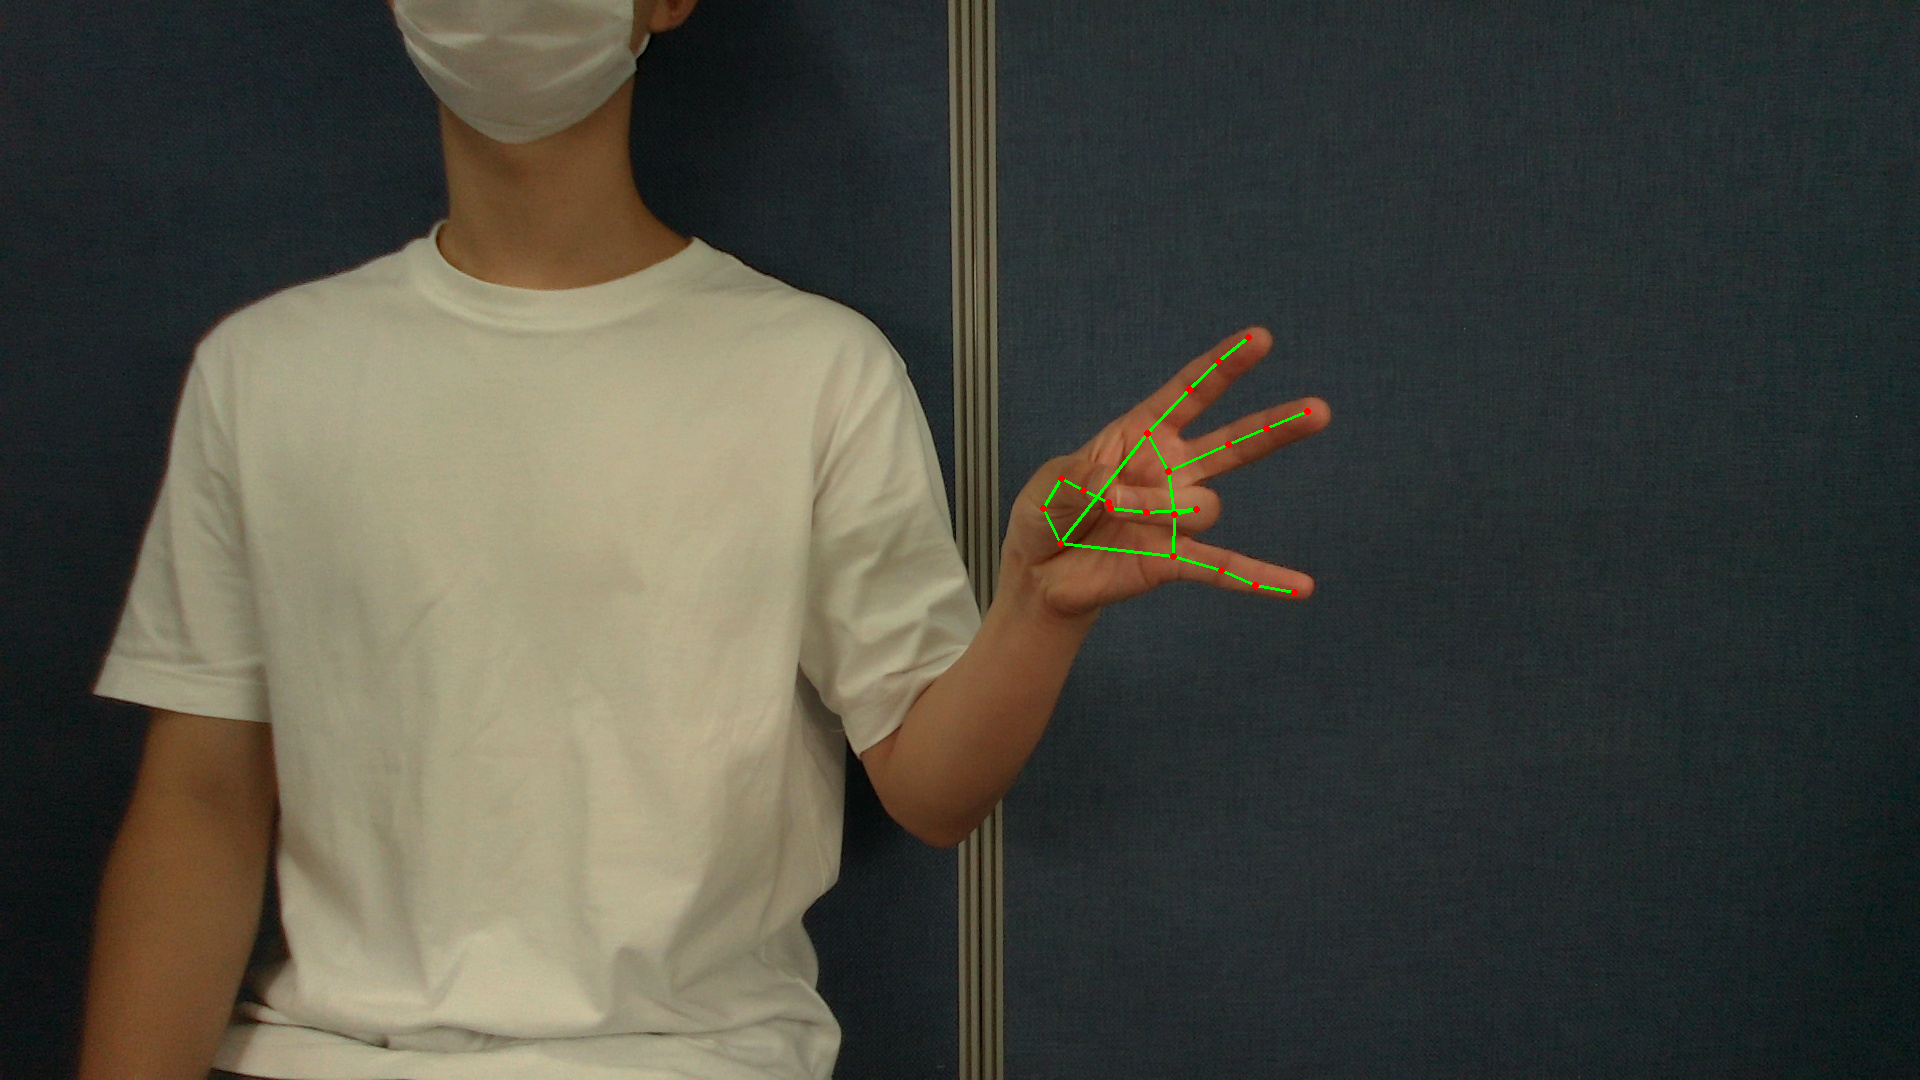

In [22]:
Image.open('C:/AIFactory/ETC/open/train\\450\\5.png')

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from tensorflow.keras.applications.efficientnet import EfficientNetB1
from tensorflow.keras.callbacks  import *
from sklearn.model_selection import StratifiedKFold

In [24]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 20)
result = 0

In [25]:
for train_index, valid_index in skf.split(alldata1,alldata1['category_id']):
    x_train = alldata1.iloc[train_index]
    x_valid = alldata1.iloc[valid_index]
    idg = ImageDataGenerator(horizontal_flip=True)
    idg2 = ImageDataGenerator()
    train_generator = idg.flow_from_dataframe(x_train, x_col = 'path', y_col = 'category_id', target_size = (100,100), batch_size = 16)
    valid_generator = idg2.flow_from_dataframe(x_valid, x_col = 'path', y_col = 'category_id', target_size = (100,100), batch_size = 16)
    es = EarlyStopping(patience = 3, restore_best_weights=True, verbose = 1)

    rl = ReduceLROnPlateau(patience = 2, factor = 0.2, verbose = 1)

    efn = EfficientNetB1(include_top = False, pooling = 'avg')

    model = Sequential()

    model.add(efn)
    model.add(Dense(157, activation = 'softmax'))
    model.compile(metrics = ['acc'], loss = 'categorical_crossentropy', optimizer = 'adam')

    model.fit(train_generator, validation_data = valid_generator, epochs = 5, callbacks = [es,rl])
    
    test_generator = idg2.flow_from_dataframe(test, x_col = 'path', y_col = None, target_size = (100,100), batch_size = 16, class_mode = None, shuffle = False) #얘도 안에다
    
    result += model.predict(test_generator, verbose = 1, workers=2) / 5

Found 4709 validated image filenames belonging to 157 classes.
Found 1178 validated image filenames belonging to 157 classes.
Epoch 1/5
295/295 [==============================] - 214s 686ms/step - loss: 3.6442 - acc: 0.2193 - val_loss: 1.6688 - val_acc: 0.5620
Epoch 2/5
295/295 [==============================] - 197s 669ms/step - loss: 0.9044 - acc: 0.7240 - val_loss: 0.4075 - val_acc: 0.8871
Epoch 3/5
295/295 [==============================] - 198s 672ms/step - loss: 0.4242 - acc: 0.8693 - val_loss: 0.5340 - val_acc: 0.8523
Epoch 4/5
295/295 [==============================] - 198s 670ms/step - loss: 0.2839 - acc: 0.9170 - val_loss: 0.4085 - val_acc: 0.8795

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 5/5
295/295 [==============================] - 201s 680ms/step - loss: 0.1357 - acc: 0.9626 - val_loss: 0.0104 - val_acc: 0.9975
Found 2038 validated image filenames.
128/128 [==============================] - 43s 324ms/step
Found 4709 validated 

In [26]:
hand = pd.read_csv('hand_gesture_pose.csv')
hand

,pose_id,pose_type,pose_name,gesture_type,hand_type,view_type
0,0,number,숫자 1,my_hand,left,1st
1,1,number,숫자 2,my_hand,left,1st
2,2,number,숫자 3,my_hand,left,1st
3,3,number,숫자 4,my_hand,left,1st
4,4,number,숫자 5,my_hand,left,1st
...,...,...,...,...,...,...
152,191,meaning,경고(주먹 내밀기),your_hand,both,3rd
153,192,meaning,X,your_hand,both,3rd
154,193,meaning,OK,your_hand,both,3rd
155,194,meaning,빅토리,your_hand,both,3rd


In [30]:
result

array([[2.4982794e-01, 1.8121099e-01, 5.3709519e-01, ..., 5.9574236e-06,
        5.1037739e-07, 1.2216886e-06],
       [2.1465951e-01, 1.1514183e-01, 5.6513399e-01, ..., 1.1266047e-05,
        1.8595880e-06, 3.0460117e-06],
       [1.0988416e-01, 2.5742192e-02, 6.7609966e-01, ..., 3.5489255e-05,
        7.0595893e-06, 7.2667349e-06],
       ...,
       [4.3179523e-07, 5.3114720e-05, 4.8577141e-07, ..., 3.5393669e-03,
        4.6252057e-06, 5.9579292e-05],
       [4.8964654e-07, 2.8294995e-05, 2.0836903e-07, ..., 3.9102713e-04,
        1.7741144e-06, 1.3127428e-05],
       [1.1596359e-06, 2.1074975e-05, 2.8127334e-07, ..., 9.9278230e-04,
        5.5135893e-06, 4.6834124e-05]], dtype=float32)

In [39]:
sub = pd.read_csv('sample_submission.csv')

In [40]:
sub

,Image_Path,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,...,Label_177,Label_186,Label_188,Label_189,Label_190,Label_191,Label_192,Label_193,Label_194,Label_195
0,./test\649,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,./test\650,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,./test\651,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,./test\652,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,./test\653,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,./test\861,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
213,./test\862,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
214,./test\863,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215,./test\864,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
answer = []
for i in range(len(sub)):
    answer.append(result[i])
sub.iloc[:,1:] = answer

In [44]:
pd.set_option('display.max_columns', 500)

In [45]:
sub

,Image_Path,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9,Label_10,Label_11,Label_12,Label_13,Label_14,Label_15,Label_16,Label_17,Label_18,Label_19,Label_22,Label_23,Label_25,Label_26,Label_27,Label_28,Label_29,Label_31,Label_32,Label_34,Label_35,Label_36,Label_37,Label_39,Label_40,Label_41,Label_42,Label_43,Label_44,Label_47,Label_48,Label_49,Label_50,Label_51,Label_53,Label_54,Label_55,Label_56,Label_57,Label_58,Label_59,Label_60,Label_61,Label_62,Label_64,Label_65,Label_66,Label_67,Label_68,Label_69,Label_70,Label_72,Label_73,Label_74,Label_75,Label_77,Label_78,Label_79,Label_80,Label_81,Label_82,Label_83,Label_85,Label_87,Label_88,Label_89,Label_90,Label_92,Label_93,Label_94,Label_95,Label_97,Label_98,Label_100,Label_101,Label_105,Label_106,Label_107,Label_109,Label_110,Label_111,Label_112,Label_113,Label_114,Label_115,Label_116,Label_117,Label_118,Label_119,Label_122,Label_123,Label_124,Label_125,Label_126,Label_128,Label_129,Label_131,Label_132,Label_133,Label_134,Label_135,Label_136,Label_137,Label_138,Label_139,Label_140,Label_141,Label_142,Label_143,Label_144,Label_145,Label_146,Label_147,Label_148,Label_149,Label_150,Label_151,Label_153,Label_154,Label_155,Label_156,Label_157,Label_158,Label_159,Label_160,Label_161,Label_162,Label_163,Label_165,Label_167,Label_168,Label_169,Label_171,Label_172,Label_173,Label_174,Label_175,Label_177,Label_186,Label_188,Label_189,Label_190,Label_191,Label_192,Label_193,Label_194,Label_195
0,./test\649,2.498279e-01,0.181211,5.370952e-01,2.017053e-07,8.528407e-05,2.014786e-07,2.335675e-06,2.082134e-06,2.201029e-07,2.105821e-03,2.647329e-05,2.189263e-06,9.511191e-07,4.121676e-07,1.041888e-07,1.686279e-07,1.121059e-04,5.654561e-07,9.307118e-07,5.593499e-07,2.558714e-06,5.908935e-07,2.137517e-07,0.000019,3.901480e-06,2.502500e-05,3.974842e-06,6.475545e-08,2.861424e-07,9.572349e-09,2.856715e-07,1.290809e-07,3.023932e-07,1.334096e-06,7.044859e-07,5.454844e-07,7.448199e-07,0.000001,2.890315e-07,1.432657e-06,8.862594e-07,1.848155e-05,1.321051e-06,0.000002,7.787064e-06,9.979150e-08,1.402187e-07,8.726086e-06,1.696906e-06,0.000001,5.697420e-07,1.382843e-05,1.098888e-04,8.551546e-07,4.732579e-07,3.974258e-08,2.120050e-06,0.000001,2.943464e-06,1.305226e-04,7.746111e-06,4.995464e-07,5.202045e-06,1.136823e-06,5.543603e-07,2.717215e-04,2.110438e-05,0.000006,2.295905e-04,8.266920e-07,6.185636e-06,9.407632e-06,0.000016,3.359597e-05,2.548046e-05,2.070414e-07,8.358278e-06,1.682908e-07,4.429561e-07,1.991199e-07,3.475005e-07,5.706051e-07,3.318972e-07,0.000009,8.210780e-06,0.000002,0.000100,1.248586e-06,0.002050,0.000105,0.000014,0.019393,0.004798,0.000001,0.000002,5.943040e-07,0.000001,1.551739e-07,0.000201,0.000003,4.411142e-07,0.000019,5.322710e-07,4.221189e-06,0.000003,0.000116,3.861494e-07,0.000007,5.276805e-06,6.380960e-06,0.000005,0.000004,2.384721e-06,1.204080e-05,3.740930e-06,4.190021e-07,6.710159e-07,1.629464e-06,3.352459e-06,6.313029e-08,1.156131e-06,0.001311,7.862643e-05,2.337738e-07,1.174109e-07,5.644852e-06,7.939490e-06,8.806859e-07,4.250099e-06,9.646616e-07,5.733590e-07,0.000012,5.664341e-06,7.272102e-07,0.000003,5.264548e-06,4.678760e-07,5.867489e-05,9.677701e-05,0.000004,2.552748e-07,1.000673e-05,8.389227e-08,7.512625e-08,3.700574e-07,2.433751e-06,1.226510e-07,9.239277e-07,3.327444e-07,0.000004,2.728009e-08,1.758247e-07,2.252944e-07,1.525822e-06,5.957424e-06,5.103774e-07,0.000001
1,./test\650,2.146595e-01,0.115142,5.651340e-01,4.525154e-07,4.052670e-04,4.326740e-07,4.303674e-06,2.924355e-06,9.021142e-07,5.277836e-04,6.288967e-05,8.291562e-06,2.564449e-06,1.307365e-06,3.966728e-07,1.064296e-06,5.853706e-04,1.007455e-06,2.700742e-06,3.541582e-06,3.250780e-06,1.719464e-06,4.889949e-07,0.000015,8.018605e-06,8.761155e-05,1.136146e-05,5.642206e-07,3.027324e-07,2.712757e-08,6.599524e-07,3.399532e-07,1.386541e-06,2.954931e-06,1.746415e-06,1.337920e-06,5.077867e-06,0.000003,8.469711e-08,4.334375e-06,2.173788e-06,8.904420e-05,4.623983e-06,0.000005,3.635271e-05,5.81314

In [42]:
sub.to_csv('sub.csv',index=False)

In [48]:
label_list = list(train_generator.class_indices.keys())

In [57]:
answer

[array([2.49827936e-01, 1.81210995e-01, 5.37095189e-01, 2.01705333e-07,
        8.52840676e-05, 2.01478571e-07, 2.33567471e-06, 2.08213442e-06,
        2.20102876e-07, 2.10582116e-03, 2.64732880e-05, 2.18926311e-06,
        9.51119148e-07, 4.12167594e-07, 1.04188835e-07, 1.68627906e-07,
        1.12105925e-04, 5.65456105e-07, 9.30711792e-07, 5.59349928e-07,
        2.55871350e-06, 5.90893535e-07, 2.13751747e-07, 1.86830912e-05,
        3.90147989e-06, 2.50249959e-05, 3.97484200e-06, 6.47554472e-08,
        2.86142352e-07, 9.57234914e-09, 2.85671462e-07, 1.29080945e-07,
        3.02393175e-07, 1.33409640e-06, 7.04485899e-07, 5.45484397e-07,
        7.44819943e-07, 1.33442427e-06, 2.89031505e-07, 1.43265652e-06,
        8.86259386e-07, 1.84815526e-05, 1.32105083e-06, 1.50163964e-06,
        7.78706362e-06, 9.97914995e-08, 1.40218688e-07, 8.72608598e-06,
        1.69690554e-06, 1.37717700e-06, 5.69742042e-07, 1.38284258e-05,
        1.09888759e-04, 8.55154553e-07, 4.73257870e-07, 3.974257

In [54]:
label_list

['0',
 '1',
 '10',
 '100',
 '101',
 '105',
 '106',
 '107',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '122',
 '123',
 '124',
 '125',
 '126',
 '128',
 '129',
 '13',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '149',
 '15',
 '150',
 '151',
 '153',
 '154',
 '155',
 '156',
 '157',
 '158',
 '159',
 '16',
 '160',
 '161',
 '162',
 '163',
 '165',
 '167',
 '168',
 '169',
 '17',
 '171',
 '172',
 '173',
 '174',
 '175',
 '177',
 '18',
 '186',
 '188',
 '189',
 '19',
 '190',
 '191',
 '192',
 '193',
 '194',
 '195',
 '2',
 '22',
 '23',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '31',
 '32',
 '34',
 '35',
 '36',
 '37',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '7

In [58]:
a = []
for i in range(sub.shape[0]):
    a.append(label_list[list(answer[i]).index(max(answer[i]))])


In [59]:
a

['10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '10',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '11',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '12',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '14',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '15',
 '10',
 '16',
 '10',
 '10',
 '16',
 '16',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '17',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '18',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '19',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '2',
 '1',
 '2',
 '1',
 '2',
 '22',
 '22',
 '22',
 '22',
 '22',
 '22'